In [1]:
%run py_import.py

In [2]:
from matplotlib import font_manager
font = font_manager.FontProperties(fname = r'C:\Windows\Fonts\msyh.ttc', size = 10)

**条形图**

([<matplotlib.axis.YTick at 0x2434fba0850>,
 [Text(0, 0, '0亿'),
  Text(0, 5, '5亿'),
  Text(0, 10, '10亿'),
  Text(0, 15, '15亿'),
  Text(0, 20, '20亿'),
  Text(0, 25, '25亿'),
  Text(0, 30, '30亿'),
  Text(0, 35, '35亿'),
  Text(0, 40, '40亿')])

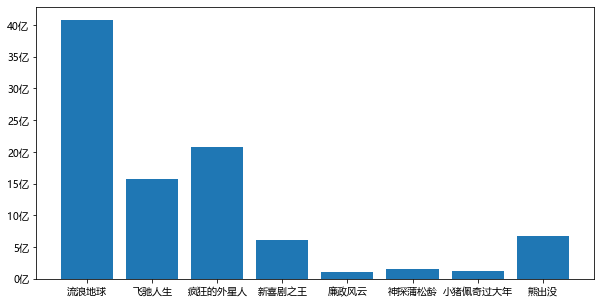

In [3]:
movies = {
    "流浪地球":40.78,
    "飞驰人生":15.77,
    "疯狂的外星人":20.83,
    "新喜剧之王":6.10,
    "廉政风云":1.10,
    "神探蒲松龄":1.49,
    "小猪佩奇过大年":1.22,
    "熊出没":6.71
}
x = list(movies.keys())
y = list(movies.values())
plt.figure(figsize = (10,5))

# plt.bar(x,y,width = 0.8,bottom = 10,color = 'b')
plt.bar(x,y)
plt.xticks(fontproperties = font)
plt.yticks(range(0,45,5),["%d亿"%x for x in range(0,45,5)],fontproperties = font)

**横向条形图**

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

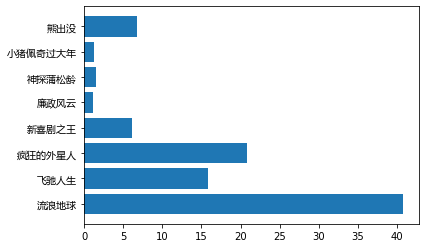

In [4]:
plt.barh(list(movies.keys()),list(movies.values()))
plt.yticks(fontproperties = font)

**分组条形图**

In [5]:
movies = {
    "流浪地球":[2.01,4.59,7.99,11.83,16],
    "飞驰人生":[3.19,5.08,6.73,8.10,9.35],
    "疯狂的外星人":[4.07,6.92,9.30,11.29,13.03],
    "新喜剧之王":[2.72,3.79,4.45,4.83,5.11],
    "廉政风云":[0.56,0.74,0.83,0.88,0.92],
    "神探蒲松龄":[0.66,0.95,1.10,1.17,1.23],
    "小猪佩奇过大年":[0.58,0.81,0.94,1.01,1.07],
    "熊出没·原始时代":[1.13,1.96,2.73,3.42,4.05]
}
movie_df = pd.DataFrame(movies)  # 转换为DataFrame
movie_df

,流浪地球,飞驰人生,疯狂的外星人,新喜剧之王,廉政风云,神探蒲松龄,小猪佩奇过大年,熊出没·原始时代
0,2.01,3.19,4.07,2.72,0.56,0.66,0.58,1.13
1,4.59,5.08,6.92,3.79,0.74,0.95,0.81,1.96
2,7.99,6.73,9.30,4.45,0.83,1.10,0.94,2.73
3,11.83,8.10,11.29,4.83,0.88,1.17,1.01,3.42
4,16.00,9.35,13.03,5.11,0.92,1.23,1.07,4.05


In [6]:
# for index in movie_df.index:
#     series = movie_df.iloc[index]
#     plt.style.use('seaborn')
# #     print(series)
#     plt.bar(series.index,series.values)
#     plt.xticks(fontproperties = font)

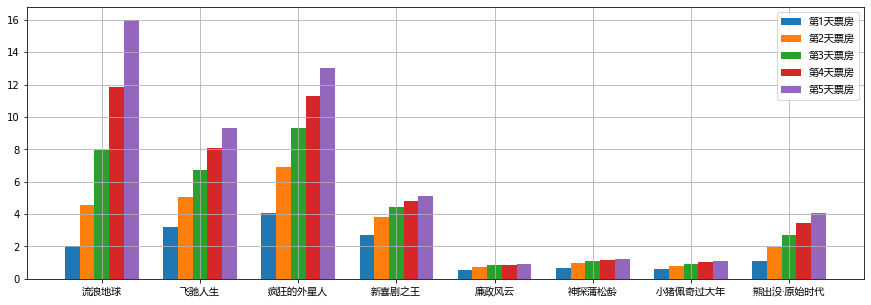

In [14]:
plt.figure(figsize = (15,5))
xticks = np.arange(len(movies))
bar_width = 0.15
# plt.bar(xticks - 2 * bar_width,movie_df.iloc[0],width = bar_width)
# plt.bar(xticks - bar_width,movie_df.iloc[1],width = bar_width)
# plt.bar(xticks,movie_df.iloc[2],width = bar_width)
# plt.bar(xticks + bar_width,movie_df.iloc[3],width = bar_width)
# plt.bar(xticks + 2 * bar_width,movie_df.iloc[4],width = bar_width)
for index in movie_df.index:
    plt.bar(xticks+(-2+index)*bar_width,movie_df.iloc[index],width = bar_width,
            label = "第%d天票房"%(index+1))
plt.xticks(xticks,movie_df.columns,fontproperties = font,size = 10)
plt.legend(prop = font)  # 添加图例
plt.grid()  # 添加网格线
plt.show()

**堆积条形图**

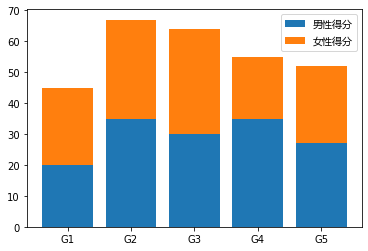

In [17]:
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
groupNames = ('G1','G2','G3','G4','G5')
plt.bar(groupNames,menMeans,label = "男性得分")
plt.bar(groupNames,womenMeans,bottom = menMeans,label = "女性得分")
plt.legend(prop = font)

### 笔记：
1. 绘制条形图用的是plt.bar方法。这个方法有很多参数：
    * x：x轴上坐标，列表/数组/字符串
    * y：y轴上坐标，列表/数组/字符串
    * data：如果传递了data，那么x和y就可以为为data中的key。比如data是一个DataFrame对象，那么x和y就是DataFrame某个列的名字。
2. 官方文档：https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
3. 横向条形图：plt.barh。y代表之前plt.bar的x，width代表bar的height
4. 分组条形图：matplotlib并没有提供专门分组条形图的API来实现，而是需要设置坐标来实现。绘制的规则：一次性绘制所有电影的第1天数据，第2天数据......，然后找到归来吧，把这个条形图的位置算好。
5. 堆叠条形图：matplotlib并没有提供专门堆叠条形图的API来实现，我们绘制往上堆叠的数据时，可以使用bottom参数，来往上偏移指定距离，就可以实现堆叠效果。